In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


# Capstone Project - The Battle of Neighborhoods

## Final Report

### Opening a new 'Multiplex' in New Delhi, India

###### (a) Build a dataframe of neighborhoods in New Delhi, India by web scraping the data from Wikipedia page
###### (b) Get the geographical coordinates of the neighborhoods
###### (c) Exploring neighborhoods of New Delhi, India using Foursquare API
###### (d) Explore and cluster the neighborhoods
###### (e) Select the best cluster to open a new Multiplex
###### (f) Provide an illustrative neighborhood

### (a) Build a dataframe of neighborhoods in New Delhi, India by web scraping the data from Wikipedia page

In [2]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Delhi").text

In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [4]:
# create a list to store neighborhood data
neighborhoodList = []

In [5]:
# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

In [6]:
# create a new DataFrame from the list
nd_df = pd.DataFrame({"Neighborhood": neighborhoodList})

nd_df.head()

,Neighborhood
0,Neighbourhoods of Delhi
1,Ashok Nagar (Delhi)
2,Ashok Vihar
3,Ashram Chowk
4,Babarpur


In [7]:
# print the number of rows of the dataframe
nd_df.shape

(142, 1)

### (b) Get the geographical coordinates of the neighborhoods

In [8]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, New Delhi, India'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [9]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in nd_df["Neighborhood"].tolist() ]

In [10]:
coords

[[28.523450000000025, 77.26178000000004],
 [28.692230000000052, 77.30124000000006],
 [28.69037000000003, 77.17609000000004],
 [28.710597501792023, 77.32696517369723],
 [28.50738000000007, 77.30346000000003],
 [28.50738000000007, 77.30346000000003],
 [28.652234222889238, 77.12939224396462],
 [28.79767000000004, 77.04522000000003],
 [28.549540000000036, 77.18167000000005],
 [28.699880000000064, 77.25906000000003],
 [28.595060000000046, 77.18573000000004],
 [28.656270000000063, 77.23232000000007],
 [28.538400000000024, 77.24832000000004],
 [28.67671000000007, 77.21767000000006],
 [28.633940000000052, 77.21968000000004],
 [28.60761000000008, 77.08714000000003],
 [28.65457890544559, 77.23339989939495],
 [28.62832000000003, 77.24727000000007],
 [28.605920000000026, 77.08529000000004],
 [28.560590000000047, 77.24678000000006],
 [28.57298000000003, 77.23357000000004],
 [28.591510000000028, 77.12945000000008],
 [28.699110000000076, 77.19105000000008],
 [28.594857177133914, 77.16729160908383],
 

In [11]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [12]:
# merge the coordinates into the original dataframe
nd_df['Latitude'] = df_coords['Latitude']
nd_df['Longitude'] = df_coords['Longitude']

In [13]:
# check the neighborhoods and the coordinates
print(nd_df.shape)
nd_df

(142, 3)


,Neighborhood,Latitude,Longitude
0,Neighbourhoods of Delhi,28.523450,77.261780
1,Ashok Nagar (Delhi),28.692230,77.301240
2,Ashok Vihar,28.690370,77.176090
3,Ashram Chowk,28.710598,77.326965
4,Babarpur,28.507380,77.303460
5,"Badarpur, Delhi",28.507380,77.303460
6,Bali Nagar,28.652234,77.129392
7,Bawana,28.797670,77.045220
8,Ber Sarai,28.549540,77.181670
9,Bhajanpura,28.699880,77.259060


In [14]:
# save the DataFrame as CSV file
nd_df.to_csv("nd_df_2904.csv", index=False)

In [15]:
# get the coordinates of New Delhi
address = 'New Delhi, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of New Delhi, India are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of New Delhi, India are 28.6141793, 77.2022662.


#### Creating map of New Delhi, India with coordinates of neighborhoods

In [16]:
# create map of New Delhi using latitude and longitude values
map_nd = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(nd_df['Latitude'], nd_df['Longitude'], nd_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_nd)  
    
map_nd

In [17]:
# save the map as HTML file
map_nd.save('map_nd_2904.html')

### (c) Exploring neighborhoods of New Delhi, India using Foursquare API

In [18]:
# define Foursquare Credentials and Version
CLIENT_ID = 'LO0R4TKTJMLFBLPQ1BXOQ52Q43M4V0UUIMWMTQD3CMKWT2BI' # your Foursquare ID
CLIENT_SECRET = '5I0YRSKSAHRSYEQQLPTHY1NMP0SBMHF2FJC02KOOXNY1US2S' # your Foursquare Secret
VERSION = '20200426' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LO0R4TKTJMLFBLPQ1BXOQ52Q43M4V0UUIMWMTQD3CMKWT2BI
CLIENT_SECRET:5I0YRSKSAHRSYEQQLPTHY1NMP0SBMHF2FJC02KOOXNY1US2S


#### Getting top 100 venues within a radius of 2000 meters

In [19]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(nd_df['Latitude'], nd_df['Longitude'], nd_df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
      
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [20]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(6190, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Neighbourhoods of Delhi,28.52345,77.26178,City Of Joy,28.532685,77.253003,Restaurant
1,Neighbourhoods of Delhi,28.52345,77.26178,Khana Khazana,28.526114,77.259298,Restaurant
2,Neighbourhoods of Delhi,28.52345,77.26178,Tughlaqabad Fort,28.511298,77.261902,Castle
3,Neighbourhoods of Delhi,28.52345,77.26178,Culinaire,28.530777,77.245816,Thai Restaurant
4,Neighbourhoods of Delhi,28.52345,77.26178,CR Park Market No. 2,28.536463,77.253386,Market


In [21]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Ashok Nagar (Delhi),5,5,5,5,5,5
Ashok Vihar,25,25,25,25,25,25
Ashram Chowk,4,4,4,4,4,4
Babarpur,6,6,6,6,6,6
"Badarpur, Delhi",6,6,6,6,6,6
Bali Nagar,54,54,54,54,54,54
Bawana,3,3,3,3,3,3
Ber Sarai,93,93,93,93,93,93
Bhajanpura,5,5,5,5,5,5


In [22]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 217 uniques categories.


### (d) Explore and cluster the neighborhoods
####     Unique categories that can be curated from venues

In [23]:
# print out the list of categories
venues_df['VenueCategory'].unique()[:50]

array(['Restaurant', 'Castle', 'Thai Restaurant', 'Market', 'Gym',
       'BBQ Joint', 'Pizza Place', 'Sandwich Place', 'Coffee Shop',
       'Fast Food Restaurant', 'Park', 'Hotel', 'Smoke Shop',
       'Tourist Information Center', 'Train Station',
       'Athletics & Sports', 'Asian Restaurant', 'Snack Place',
       'Indian Restaurant', 'South Indian Restaurant', 'Department Store',
       'Dessert Shop', 'Basketball Court', 'Light Rail Station', 'ATM',
       'Indian Sweet Shop', 'Convenience Store', 'American Restaurant',
       'Diner', 'Donut Shop', 'Bakery', 'Hookah Bar', 'Café',
       'Sports Bar', 'Garden Center', 'Pub', 'Fried Chicken Joint',
       'Shopping Mall', 'Furniture / Home Store', 'Multiplex',
       'Chinese Restaurant', 'Metro Station', 'Bar', 'Flea Market',
       'Ice Cream Shop', 'Music Venue', 'Garden', 'Business Service',
       'Campground', 'Playground'], dtype=object)

In [24]:
# check if the results contain "unique values"
"Neighborhood" in venues_df['VenueCategory'].unique()

True

#### Analysing each neighborhood

In [25]:
# one hot encoding
nd_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nd_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nd_onehot.columns[-1]] + list(nd_onehot.columns[:-1])
nd_onehot = nd_onehot[fixed_columns]

print(nd_onehot.shape)
nd_onehot.head()

(6190, 218)


,Neighborhoods,ATM,Accessories Store,Airport,Airport Food Court,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Bengali Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Boutique,Breakfast Spot,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Campground,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farm,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hindu Temple,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Karnataka Restaurant,Korean Restaurant,Lake,Leather Goods Store,Light Rail Station,Liquor Store,Lounge,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Nightlife Spot,North Indian Restaurant,Northeast Indian Restaurant,Office,Other Great Outdoors,Other Nightlife,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Print Shop,Pub,Public Art,Punjabi Restaurant,Racetrack,Recreation Center,Rental Car Location,Rest Area,Restaurant,River,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South Indian Restaurant,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tea Room,Temple,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Women's Store,Yoga Studio,Zoo
0,Neighbourhoods of Delhi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Neighbourhoods of Delhi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Grouping rows by neighborhood and by taking mean of  frequency of occurrence of each category

In [26]:
nd_grouped = nd_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(nd_grouped.shape)
nd_grouped

(142, 218)


,Neighborhoods,ATM,Accessories Store,Airport,Airport Food Court,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Bengali Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Boutique,Breakfast Spot,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Campground,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farm,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hindu Temple,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Karnataka Restaurant,Korean Restaurant,Lake,Leather Goods Store,Light Rail Station,Liquor Store,Lounge,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Nightlife Spot,North Indian Restaurant,Northeast Indian Restaurant,Office,Other Great Outdoors,Other Nightlife,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Print Shop,Pub,Public Art,Punjabi Restaurant,Racetrack,Recreation Center,Rental Car Location,Rest Area,Restaurant,River,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South Indian Restaurant,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tea Room,Temple,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Women's Store,Yoga Studio,Zoo
0,Ashok Nagar (Delhi),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0

#### Creating a new DataFrame for Multiplex only

In [27]:
len(nd_grouped[nd_grouped["Multiplex"] > 0])

27

In [28]:
nd_mp = nd_grouped[["Neighborhoods","Multiplex"]]

In [29]:
nd_mp.head()

,Neighborhoods,Multiplex
0,Ashok Nagar (Delhi),0.0
1,Ashok Vihar,0.0
2,Ashram Chowk,0.0
3,Babarpur,0.0
4,"Badarpur, Delhi",0.0


### Cluster Neighborhoods
#### Run k-means to cluster the neighborhoods in New Delhi, India into 3 clusters.

In [30]:
kclusters = 3

nd_clustering = nd_mp.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nd_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0])

In [31]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
nd_merged = nd_mp.copy()

# add clustering labels
nd_merged["Cluster Labels"] = kmeans.labels_

In [32]:
nd_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
nd_merged.head()

,Neighborhood,Multiplex,Cluster Labels
0,Ashok Nagar (Delhi),0.0,0
1,Ashok Vihar,0.0,0
2,Ashram Chowk,0.0,0
3,Babarpur,0.0,0
4,"Badarpur, Delhi",0.0,0


In [33]:
# merge nd_grouped with nd_data to add latitude/longitude for each neighborhood
nd_merged = nd_merged.join(nd_df.set_index("Neighborhood"), on="Neighborhood")

print(nd_merged.shape)
nd_merged.head() # check the last columns!

(142, 5)


,Neighborhood,Multiplex,Cluster Labels,Latitude,Longitude
0,Ashok Nagar (Delhi),0.0,0,28.692230,77.301240
1,Ashok Vihar,0.0,0,28.690370,77.176090
2,Ashram Chowk,0.0,0,28.710598,77.326965
3,Babarpur,0.0,0,28.507380,77.303460
4,"Badarpur, Delhi",0.0,0,28.507380,77.303460


In [34]:
# sort the results by Cluster Labels
print(nd_merged.shape)
nd_merged.sort_values(["Cluster Labels"], inplace=True)
nd_merged

(142, 5)


,Neighborhood,Multiplex,Cluster Labels,Latitude,Longitude
0,Ashok Nagar (Delhi),0.000000,0,28.692230,77.301240
96,Pamposh Enclave,0.000000,0,28.546776,77.244759
95,Palika Bazaar,0.000000,0,28.631560,77.219590
94,Palam,0.000000,0,28.591060,77.091170
93,Paharganj,0.000000,0,28.645960,77.214920
92,Old Delhi,0.000000,0,28.654340,77.232580
91,Okhla,0.000000,0,28.532470,77.278390
90,Nizamuddin West,0.000000,0,28.588650,77.244860
89,Nizamuddin East,0.000000,0,28.602462,77.265791
88,Nigambodh Ghat,0.000000,0,28.664710,77.236330


### Visualizing the clusters in the map

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nd_merged['Latitude'], nd_merged['Longitude'], nd_merged['Neighborhood'], nd_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [36]:
# save the map as HTML file
map_clusters.save('map_clusters_2904.html')

### (e) Select the best cluster to open a new Multiplex

In [37]:
nd_merged.loc[nd_merged['Cluster Labels'] == 0]

,Neighborhood,Multiplex,Cluster Labels,Latitude,Longitude
0,Ashok Nagar (Delhi),0.000000,0,28.692230,77.301240
96,Pamposh Enclave,0.000000,0,28.546776,77.244759
95,Palika Bazaar,0.000000,0,28.631560,77.219590
94,Palam,0.000000,0,28.591060,77.091170
93,Paharganj,0.000000,0,28.645960,77.214920
92,Old Delhi,0.000000,0,28.654340,77.232580
91,Okhla,0.000000,0,28.532470,77.278390
90,Nizamuddin West,0.000000,0,28.588650,77.244860
89,Nizamuddin East,0.000000,0,28.602462,77.265791
88,Nigambodh Ghat,0.000000,0,28.664710,77.236330


In [38]:
nd_merged.loc[nd_merged['Cluster Labels'] == 1]

,Neighborhood,Multiplex,Cluster Labels,Latitude,Longitude
105,Rajouri Garden,0.055556,1,28.64562,77.12209
100,Pitam Pura,0.055556,1,28.69590,77.13725
128,Shivaji Place,0.052632,1,28.65265,77.12139
39,Inder Puri,0.125000,1,28.62803,77.14504
123,Shalimar Bagh (Delhi Assembly constituency),0.066667,1,28.71423,77.15744
132,Tilak Nagar (Delhi),0.090909,1,28.64089,77.08922
77,Nanakpura,0.066667,1,28.62288,77.11337
107,"Rani Bagh, Delhi",0.066667,1,28.68584,77.13188
80,Naraina Area,0.066667,1,28.63366,77.13672
138,Vivek Vihar subdivision,0.058824,1,28.64642,77.30615


In [39]:
nd_bar1 = nd_merged.loc[nd_merged['Cluster Labels'] == 1]

In [40]:
import seaborn as sns

[Text(0, 0, 'Rajouri Garden'),
 Text(0, 0, 'Pitam Pura'),
 Text(0, 0, 'Shivaji Place'),
 Text(0, 0, 'Inder Puri'),
 Text(0, 0, 'Shalimar Bagh (Delhi Assembly constituency)'),
 Text(0, 0, 'Tilak Nagar (Delhi)'),
 Text(0, 0, 'Nanakpura'),
 Text(0, 0, 'Rani Bagh, Delhi'),
 Text(0, 0, 'Naraina Area'),
 Text(0, 0, 'Vivek Vihar subdivision'),
 Text(0, 0, 'Keshav Puram')]

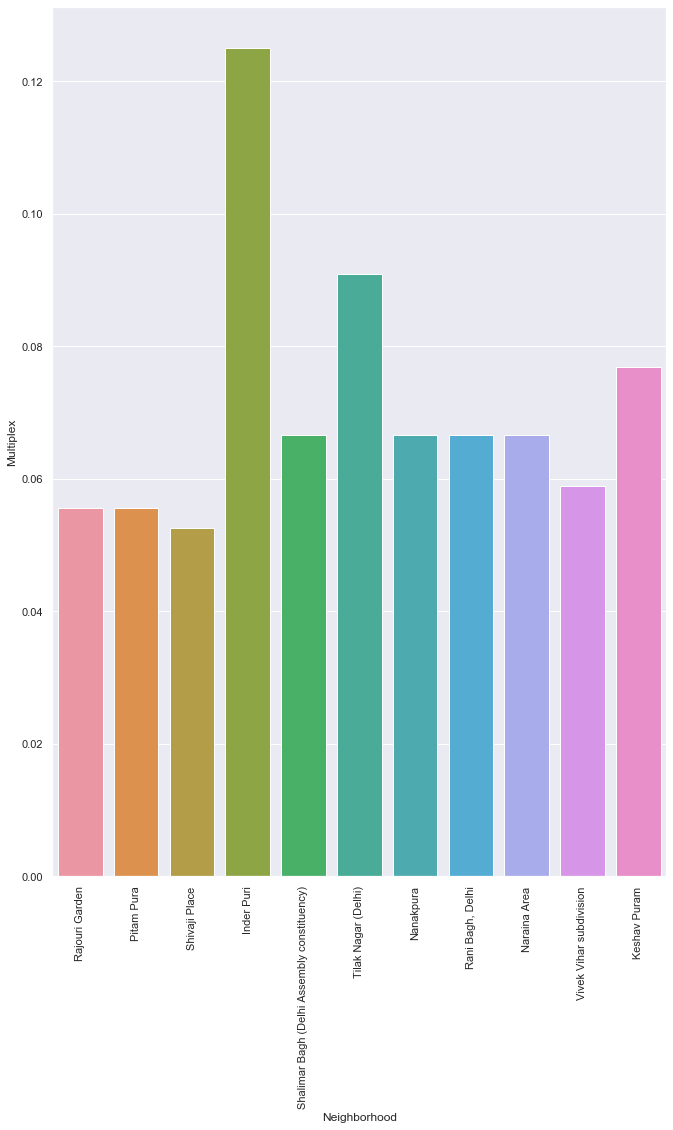

In [41]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='Multiplex',data=nd_bar1)
plot.set_xticklabels(nd_bar1['Neighborhood'],rotation=90)

In [42]:
nd_merged.loc[nd_merged['Cluster Labels'] == 2]

,Neighborhood,Multiplex,Cluster Labels,Latitude,Longitude
65,Malviya Nagar (Delhi),0.040000,2,28.533940,77.207020
135,Vasant Kunj,0.016667,2,28.531520,77.150200
58,Laxmibai Nagar,0.016129,2,28.578150,77.206180
63,Mahipalpur,0.015873,2,28.548420,77.136360
5,Bali Nagar,0.018519,2,28.652234,77.129392
84,"Netaji Nagar, Delhi",0.032787,2,28.577460,77.185170
53,Kirti Nagar,0.028571,2,28.648210,77.142730
43,"Kabir Nagar, New Delhi",0.037037,2,28.689664,77.141038
40,Janakpuri,0.041667,2,28.627910,77.090600
87,New Moti Bagh,0.021978,2,28.580997,77.181823


In [43]:
nd_bar2 = nd_merged.loc[nd_merged['Cluster Labels'] == 2]

[Text(0, 0, 'Malviya Nagar (Delhi)'),
 Text(0, 0, 'Vasant Kunj'),
 Text(0, 0, 'Laxmibai Nagar'),
 Text(0, 0, 'Mahipalpur'),
 Text(0, 0, 'Bali Nagar'),
 Text(0, 0, 'Netaji Nagar, Delhi'),
 Text(0, 0, 'Kirti Nagar'),
 Text(0, 0, 'Kabir Nagar, New Delhi'),
 Text(0, 0, 'Janakpuri'),
 Text(0, 0, 'New Moti Bagh'),
 Text(0, 0, 'Sarojini Nagar'),
 Text(0, 0, 'Saket District Centre'),
 Text(0, 0, 'Saket (Delhi)'),
 Text(0, 0, 'Geetanjali Enclave'),
 Text(0, 0, 'Punjabi Bagh')]

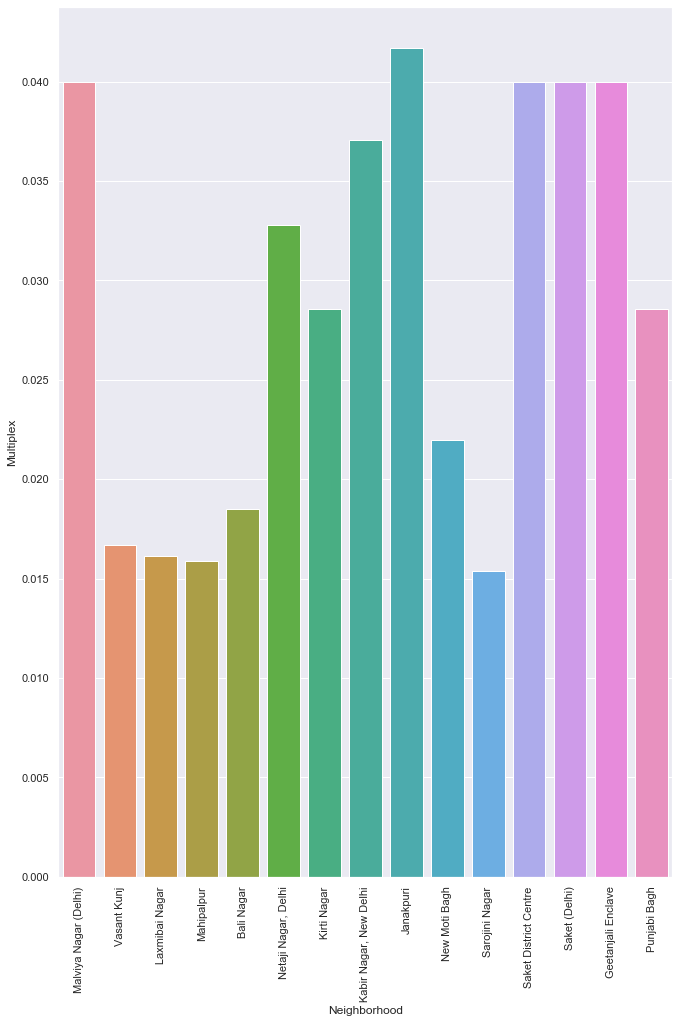

In [44]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='Multiplex',data=nd_bar2)
plot.set_xticklabels(nd_bar2['Neighborhood'],rotation=90)

### (f) Provide an illustrative neighborhood - Punjabi Bagh

In [45]:
tgt_cluster_dataframe = venues_df.loc[venues_df['Neighborhood']=='Punjabi Bagh']

In [46]:
tgt_cluster_dataframe.reset_index()

,index,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,4354,Punjabi Bagh,28.66634,77.125,Dunkin',28.666258,77.126289,Donut Shop
1,4355,Punjabi Bagh,28.66634,77.125,Starbucks,28.666321,77.125323,Coffee Shop
2,4356,Punjabi Bagh,28.66634,77.125,T.G.I. Friday's,28.653093,77.123155,American Restaurant
3,4357,Punjabi Bagh,28.66634,77.125,Khan Chacha,28.666151,77.127301,Indian Restaurant
4,4358,Punjabi Bagh,28.66634,77.125,PUNJABI BAGH CLUB,28.665350,77.131233,Garden Center
5,4359,Punjabi Bagh,28.66634,77.125,Subway,28.670817,77.134070,Sandwich Place
6,4360,Punjabi Bagh,28.66634,77.125,Domino's Pizza,28.665877,77.111579,Pizza Place
7,4361,Punjabi Bagh,28.66634,77.125,Giani's,28.665897,77.111560,Ice Cream Shop
8,4362,Punjabi Bagh,28.66634,77.125,McDonald's,28.666553,77.134857,Fast Food Restaurant
9,4363,Punjabi Bagh,28.66634,77.125,Aanch,28.651054,77.121339,Hookah Bar
